<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

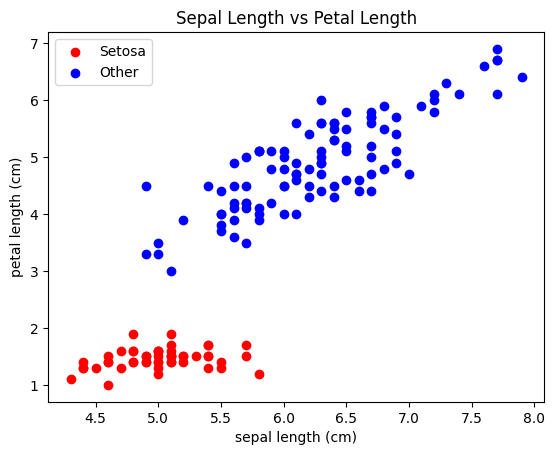

In [7]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)


mix = np.concatenate((X, np.array([y]).transpose()), axis=1)
rng = np.random.default_rng()
rng.shuffle(mix)
test_mix = mix[:int(0.2*len(mix)),:]
train_mix = mix[int(0.2*len(mix)):,:]
test_x = test_mix[:,0:3]
test_y = test_mix[:,3]
train_x = train_mix[:,0:3]
train_y = train_mix[:,3]

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [8]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [9]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [10]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [11]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [15]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 10 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    #plot_cost(loss_list)
    # This function will return the final weights as an array
    return W,loss_list

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 15.83333333 121.04166667 137.33333333] 	
iteration: 11 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 1.58333333 12.10416667 13.73333333] 	
iteration: 11 	 cost: 0.000320592237947578 	 weights: [-1.64260329 -4.07516845  9.49728593] 	
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.15833333 1.21041667 1.37333333] 	
iteration: 11 	 cost: 0.023241758040952396 	 weights: [-0.57550454 -1.47119421  3.1517102 ] 	
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.01583333 0.12104167 0.13733333] 	
iteration: 11 	 cost: 0.3952523804046551 	 weights: [-0.05841224 -0.10532128  0.46259359] 	
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00158333 0.01210417 0.01373333] 	
iteration: 11 	 cost: 0.5557994331047031 	 weights: [0.00589768 0.06303833 0.10232119] 	
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00015833 0.00121042 0.001373

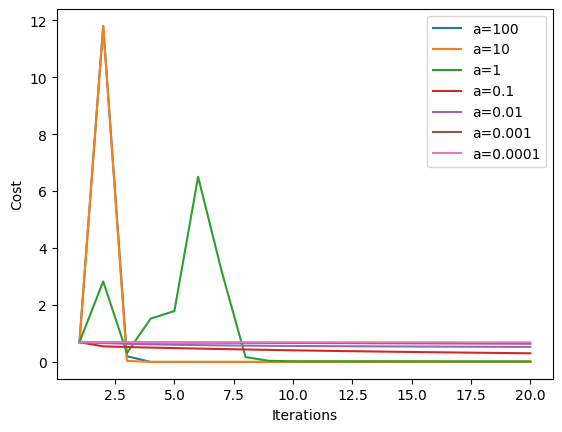

In [25]:
alpha = [100,10,1,0.1,0.01,0.001,0.0001]
num_iter = 20
for a in alpha:
    model_weights,losses = fit(a, num_iter, train_x,train_y)
    plt.plot(range(1, len(losses) + 1), losses, label='a='+str(a))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
# plt.savefig('plot.pdf')
plt.show()

======================================a: 100=============================
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 15.83333333 121.04166667 137.33333333] 	
iteration: 11 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 21 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 31 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 41 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 51 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 61 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 71 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 81 	 cost: -1.1102230246251561e-15 	 weights: [-16.66979932 -42.55952412  92.98903534] 	
iteration: 91 	 cost: -1.1102230

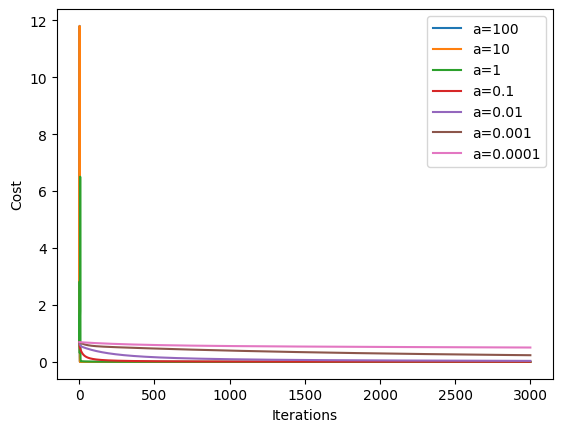

In [32]:
alpha = [100,10,1,0.1,0.01,0.001,0.0001]
num_iter = 3000
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result
    
for a in alpha:
    print('======================================a: '+str(a)+'=============================')
    model_weights,losses = fit(a, num_iter, train_x,train_y)
    plt.plot(range(1, len(losses) + 1), losses, label='a='+str(a))
    predictions = predict(test_x, model_weights)
    pred = predictions.astype('int')
    true = test_y.astype('int')
    conf_matrix = compute_confusion_matrix(true, pred)
    print('Confusion matrix result: ')
    print(conf_matrix)

    diagonal_sum = conf_matrix.trace()
    sum_of_all_elements = conf_matrix.sum()
    accuracy = diagonal_sum / sum_of_all_elements
    print('accuracy = {:0.2f}%'.format(accuracy*100))
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='upper right')
# plt.savefig('plot.pdf')
plt.show()

In [ ]:
predictions = predict(test_x, model_weights)
pred = predictions.astype('int')
true = test_y.astype('int')

In [ ]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[13.  0.]
 [ 0. 17.]]
accuracy = 100.00%


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.
